In [1]:
#Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt

<h2><b>Multi-Polynomial Regression Model (UnFair-Non-LinearData)</b></h2>

In [2]:
data = {
    'Temperature': [3.745401, 5.986585, 0.580836, 7.080725, 8.324426, 1.834045, 7.319939, 2.378245, 8.811031, 5.684332, 5.198774, 7.663628, 6.544313, 3.072486, 1.343266],
    
    'Humidity': [9.507143, 1.560186, 8.661761, 0.205845, 2.123391, 0.633401, 2.177010, 1.182744, 3.584657, 7.058325, 6.055186, 1.467559, 0.775133, 1.658308, 6.847860],
    
    'Wind Speed': [7.319939, 1.559945, 6.011150, 9.699099, 1.818250, 6.046230, 5.722522, 5.473319, 4.059267, 8.136442, 0.024679, 0.005043, 1.492149, 4.712586, 5.568121],
    
    'Air Quality': [271.920114, 108.932152, 232.803222, 83.745125, 124.015433, 102.831976, 180.019964, 111.233256, 148.039175, 253.065306, 73.489045, 94.736801, 74.183347, 143.616875, 198.664285]
}

df = pd.DataFrame(data)
df.head(7)

,Temperature,Humidity,Wind Speed,Air Quality
0,3.745401,9.507143,7.319939,271.920114
1,5.986585,1.560186,1.559945,108.932152
2,0.580836,8.661761,6.011150,232.803222
3,7.080725,0.205845,9.699099,83.745125
4,8.324426,2.123391,1.818250,124.015433
5,1.834045,0.633401,6.046230,102.831976
6,7.319939,2.177010,5.722522,180.019964


In [3]:
# Temperature, Humidity, Wind Speed (X) and Air Quality (Y)

X = df[['Temperature', 'Humidity', 'Wind Speed']]
Y = df['Air Quality']

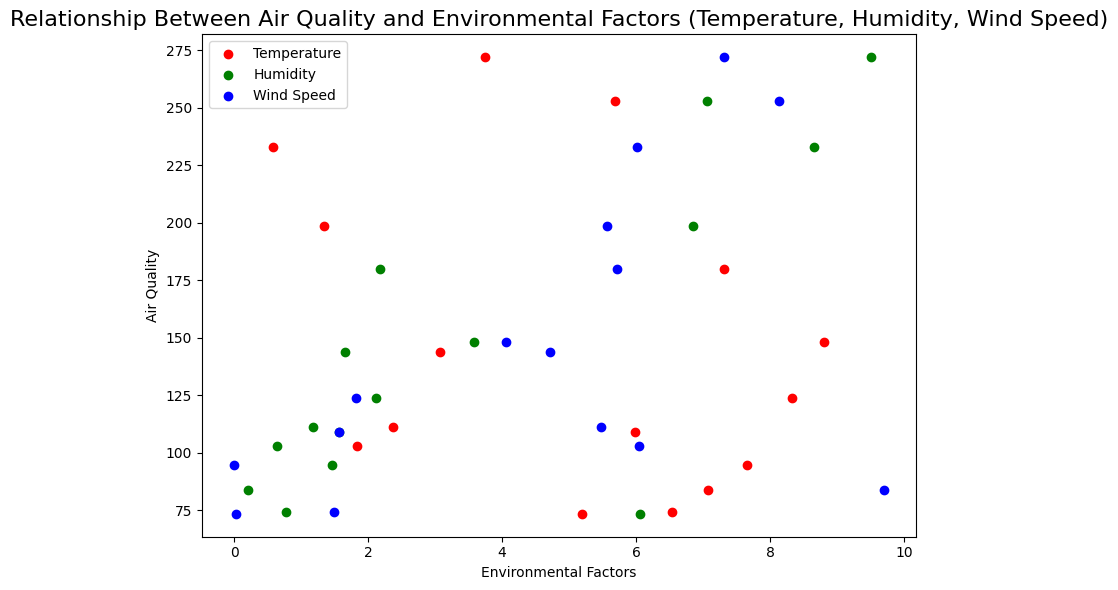

In [4]:
plt.figure(figsize=(8, 6))

# Plot Temperature vs Y with color red
plt.scatter(X['Temperature'], Y, color='red', label='Temperature')

# Plot Humidity vs Y with color green
plt.scatter(X['Humidity'], Y, color='green', label='Humidity')

# Plot Wind Speed vs Y with color blue
plt.scatter(X['Wind Speed'], Y, color='blue', label='Wind Speed')

plt.xlabel('Environmental Factors')
plt.ylabel('Air Quality')
plt.title('Relationship Between Air Quality and Environmental Factors (Temperature, Humidity, Wind Speed)', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

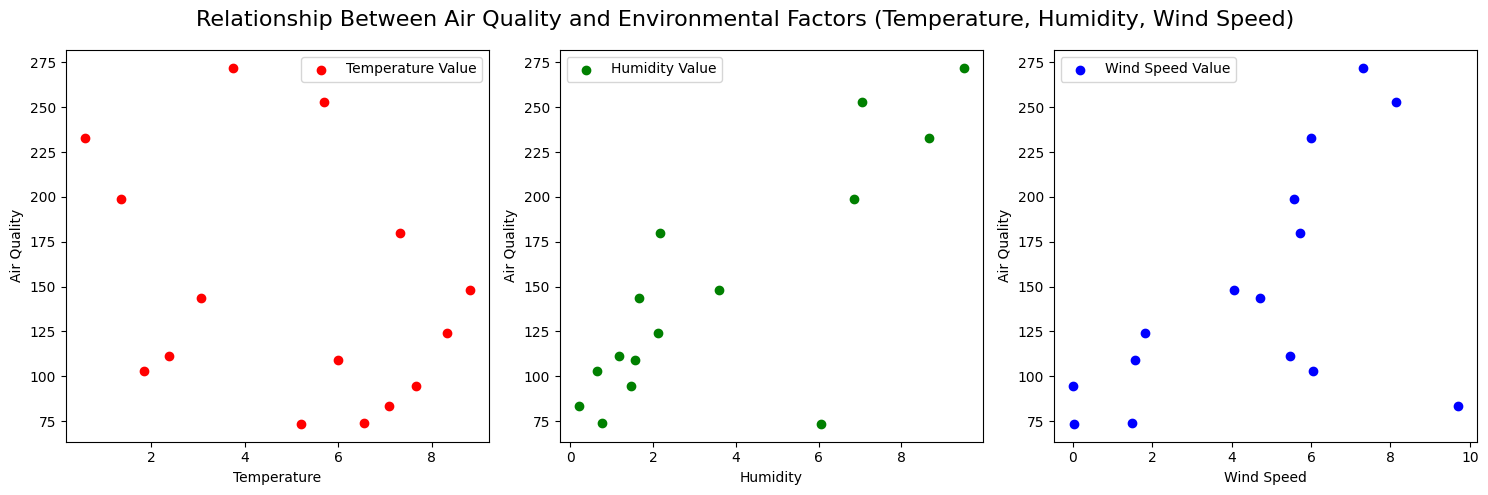

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Temperature vs Y
axs[0].scatter(X['Temperature'], Y, color='red', label='Temperature Value')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Air Quality')
axs[0].legend()

# Plot Humidity vs Y
axs[1].scatter(X['Humidity'], Y, color='green', label='Humidity Value')
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Air Quality')
axs[1].legend()

# Plot Hotness vs Y
axs[2].scatter(X['Wind Speed'], Y, color='blue', label='Wind Speed Value')
axs[2].set_xlabel('Wind Speed')
axs[2].set_ylabel('Air Quality')
axs[2].legend()

fig.suptitle('Relationship Between Air Quality and Environmental Factors (Temperature, Humidity, Wind Speed)', fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Split the data into training and testing sets (80% train, 20% test)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
# Making a Model with Best fit Degree

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

degrees = [2,3,5,7]
errors = {}

for val in degrees:
    model = Pipeline([
        ('ploynomialModel', PolynomialFeatures(degree=val)),
        ('LinearModel', LinearRegression())
    ])
    
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, Y_pred)
    
    errors[f'degree - {val}'] = {'Mean Square Error' : mse,  'Model' : model}

In [8]:
# Evaluating the Error

for key, value in errors.items():
    print(f"Key: {key}, Mean Square Error: {value['Mean Square Error']}")

Key: degree - 2, Mean Square Error: 14638777.875211447
Key: degree - 3, Mean Square Error: 11995.110750483069
Key: degree - 5, Mean Square Error: 48596.046989119655
Key: degree - 7, Mean Square Error: 215750.3212742426


In [9]:
# Selecting Best line Degree which is 3

val = errors['degree - 3']
model = val['Model']

In [10]:
# Comparing the Actual Values and Predicting Values

Y_pred = model.predict(X_test)
compareValue = pd.DataFrame({'Actual Value' : Y_test, 'Predicted value' : Y_pred})
compareValue

,Actual Value,Predicted value
9,253.065306,456.363482
11,94.736801,204.059238
0,271.920114,212.238303
13,143.616875,142.609135
5,102.831976,46.875957


In [11]:
# Evaluate the model

from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE : {mean_squared_error(Y_test, Y_pred)}")
print(f"Round Sq : {r2_score(Y_test, Y_pred)}")

MSE : 11995.110750483069
Round Sq : -1.1337982150733694


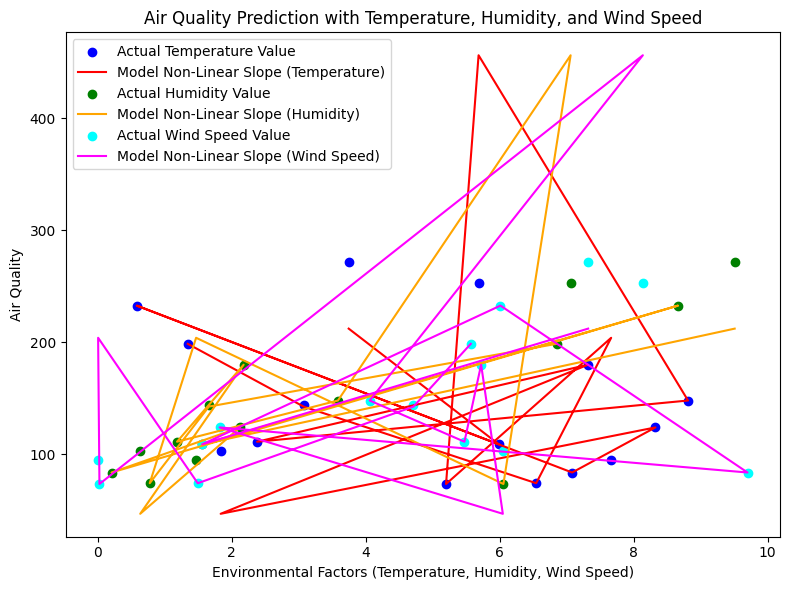

In [12]:
plt.figure(figsize=(8, 6))

# Plot Actual Values for Temperature with color blue
plt.scatter(X['Temperature'], Y, color='blue', label='Actual Temperature Value')

# Plot Model's Non-Linear Predictions for Temperature with color red
plt.plot(X['Temperature'], model.predict(X), color='red', label='Model Non-Linear Slope (Temperature)')

# Plot Actual Values for Humidity with color green
plt.scatter(X['Humidity'], Y, color='green', label='Actual Humidity Value')

# Plot Model's Non-Linear Predictions for Humidity with color orange
plt.plot(X['Humidity'], model.predict(X), color='orange', label='Model Non-Linear Slope (Humidity)')

# Plot Actual Values for Wind Speed with color cyan
plt.scatter(X['Wind Speed'], Y, color='cyan', label='Actual Wind Speed Value')

# Plot Model's Non-Linear Predictions for Wind Speed with color magenta
plt.plot(X['Wind Speed'], model.predict(X), color='magenta', label='Model Non-Linear Slope (Wind Speed)')

plt.title('Air Quality Prediction with Temperature, Humidity, and Wind Speed')
plt.xlabel('Environmental Factors (Temperature, Humidity, Wind Speed)')
plt.ylabel('Air Quality')
plt.legend()

plt.tight_layout()
plt.show()


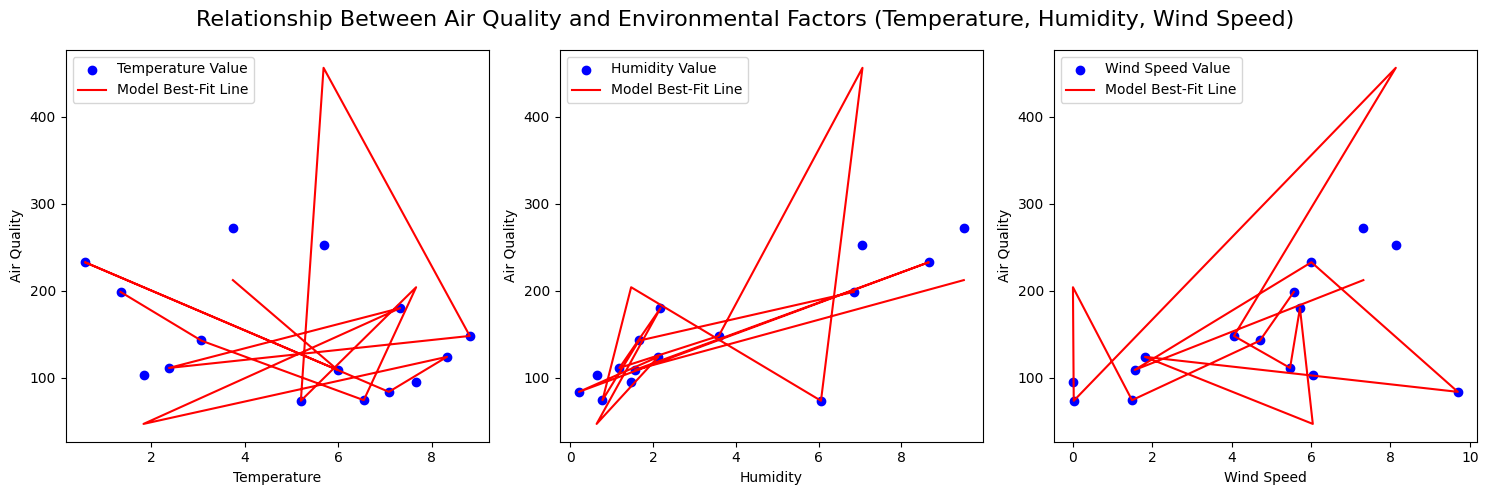

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Temperature vs Y
axs[0].scatter(X['Temperature'], Y, color='blue', label='Temperature Value')
axs[0].plot(X['Temperature'], model.predict(X), color='red', label='Model Best-Fit Line')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Air Quality')
axs[0].legend()

# Plot Humidity vs Y
axs[1].scatter(X['Humidity'], Y, color='blue', label='Humidity Value')
axs[1].plot(X['Humidity'], model.predict(X), color='red', label='Model Best-Fit Line')
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Air Quality')
axs[1].legend()

# Plot Hotness vs Y
axs[2].scatter(X['Wind Speed'], Y, color='blue', label='Wind Speed Value')
axs[2].plot(X['Wind Speed'], model.predict(X), color='red', label='Model Best-Fit Line')
axs[2].set_xlabel('Wind Speed')
axs[2].set_ylabel('Air Quality')
axs[2].legend()

fig.suptitle('Relationship Between Air Quality and Environmental Factors (Temperature, Humidity, Wind Speed)', fontsize=16)
plt.tight_layout()
plt.show()

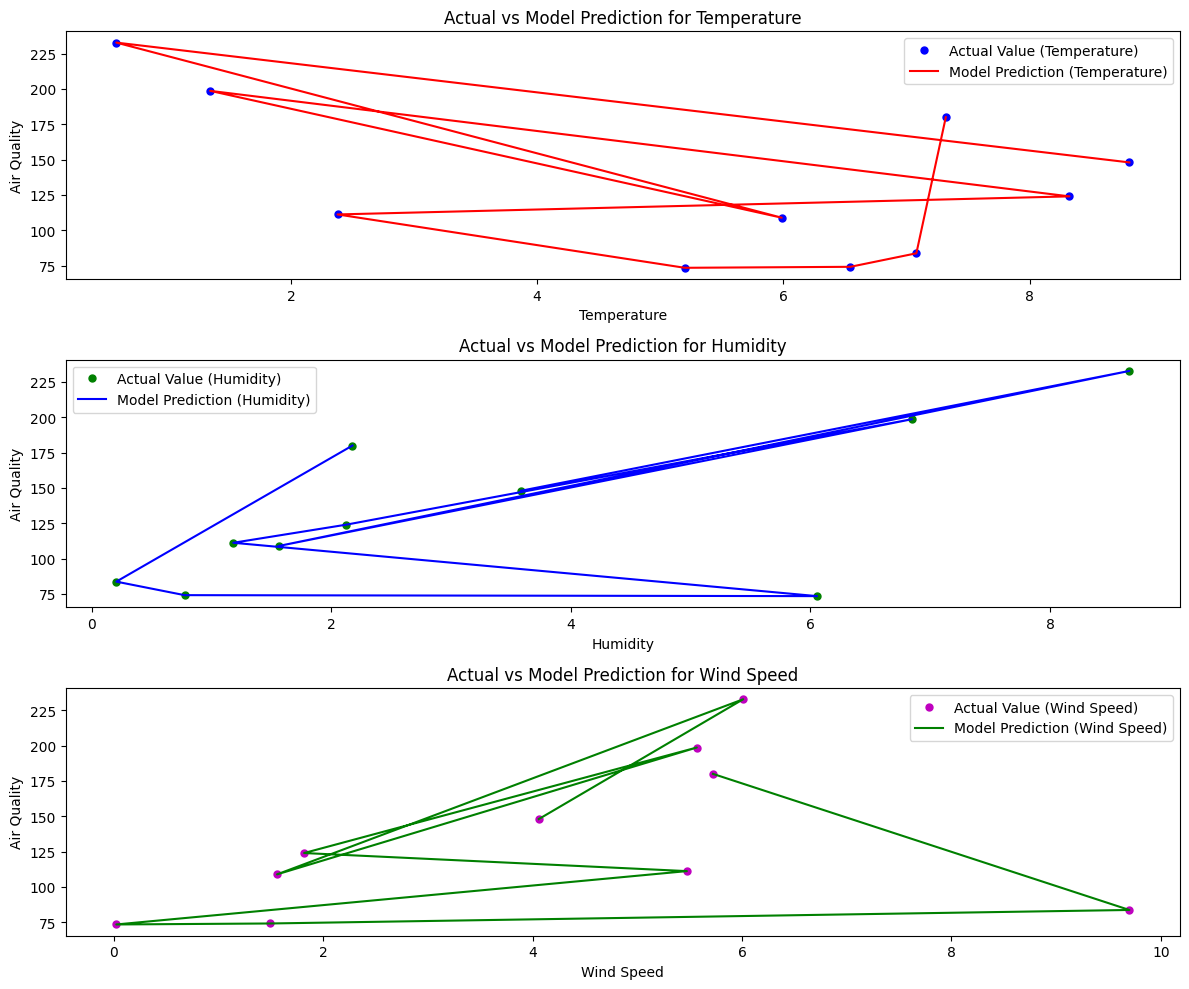

In [14]:
plt.figure(figsize=(12, 10))

# Plot Actual vs Predicted for Temperature
plt.subplot(3, 1, 1)
plt.plot(X_train['Temperature'], Y_train, 'bo', label='Actual Value (Temperature)', markersize=5)
plt.plot(X_train['Temperature'], model.predict(X_train), 'r-', label='Model Prediction (Temperature)')
plt.xlabel('Temperature')
plt.ylabel('Air Quality')
plt.title('Actual vs Model Prediction for Temperature')
plt.legend()

# Plot Actual vs Predicted for Humidity
plt.subplot(3, 1, 2)
plt.plot(X_train['Humidity'], Y_train, 'go', label='Actual Value (Humidity)', markersize=5)
plt.plot(X_train['Humidity'], model.predict(X_train), 'b-', label='Model Prediction (Humidity)')
plt.xlabel('Humidity')
plt.ylabel('Air Quality')
plt.title('Actual vs Model Prediction for Humidity')
plt.legend()

# Plot Actual vs Predicted for Wind Speed
plt.subplot(3, 1, 3)
plt.plot(X_train['Wind Speed'], Y_train, 'mo', label='Actual Value (Wind Speed)', markersize=5)
plt.plot(X_train['Wind Speed'], model.predict(X_train), 'g-', label='Model Prediction (Wind Speed)')
plt.xlabel('Wind Speed')
plt.ylabel('Air Quality')
plt.title('Actual vs Model Prediction for Wind Speed')
plt.legend()

plt.tight_layout()
plt.show()


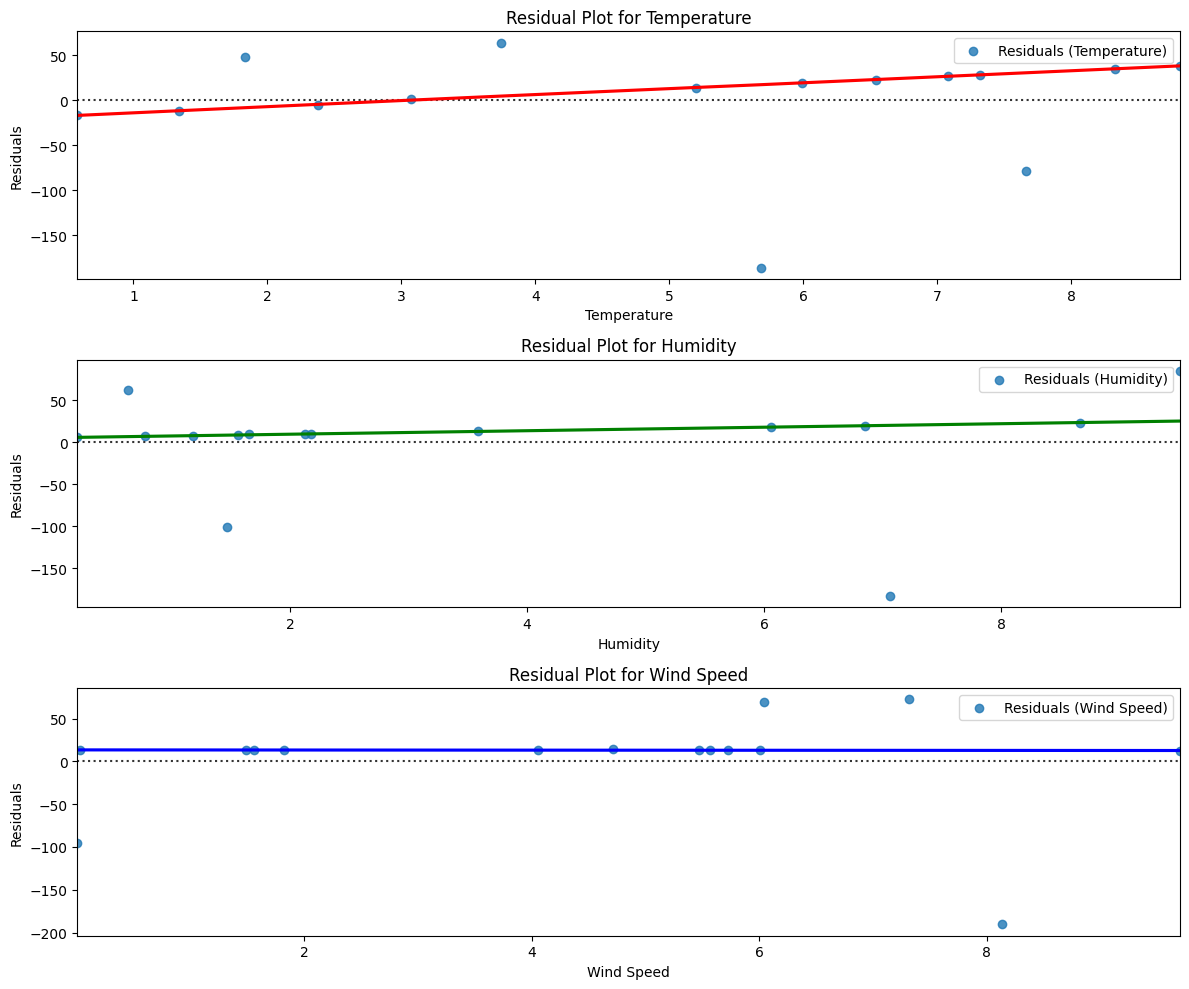

In [15]:
import seaborn as sns

# Predictions for X_train
Y_pred = model.predict(X)

# Residuals for each environmental factor
residuals_temp = Y - Y_pred
residuals_hum = Y - Y_pred
residuals_ws = Y - Y_pred

plt.figure(figsize=(12, 10))

# Residuals for Temperature
plt.subplot(3, 1, 1)
sns.residplot(x=X['Temperature'], y=residuals_temp, lowess=True, line_kws={'color': 'red'}, label='Residuals (Temperature)')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot for Temperature')
plt.legend()

# Residuals for Humidity
plt.subplot(3, 1, 2)
sns.residplot(x=X['Humidity'], y=residuals_hum, lowess=True, line_kws={'color': 'green'}, label='Residuals (Humidity)')
plt.xlabel('Humidity')
plt.ylabel('Residuals')
plt.title('Residual Plot for Humidity')
plt.legend()

# Residuals for Wind Speed
plt.subplot(3, 1, 3)
sns.residplot(x=X['Wind Speed'], y=residuals_ws, lowess=True, line_kws={'color': 'blue'}, label='Residuals (Wind Speed)')
plt.xlabel('Wind Speed')
plt.ylabel('Residuals')
plt.title('Residual Plot for Wind Speed')
plt.legend()

plt.tight_layout()
plt.show()


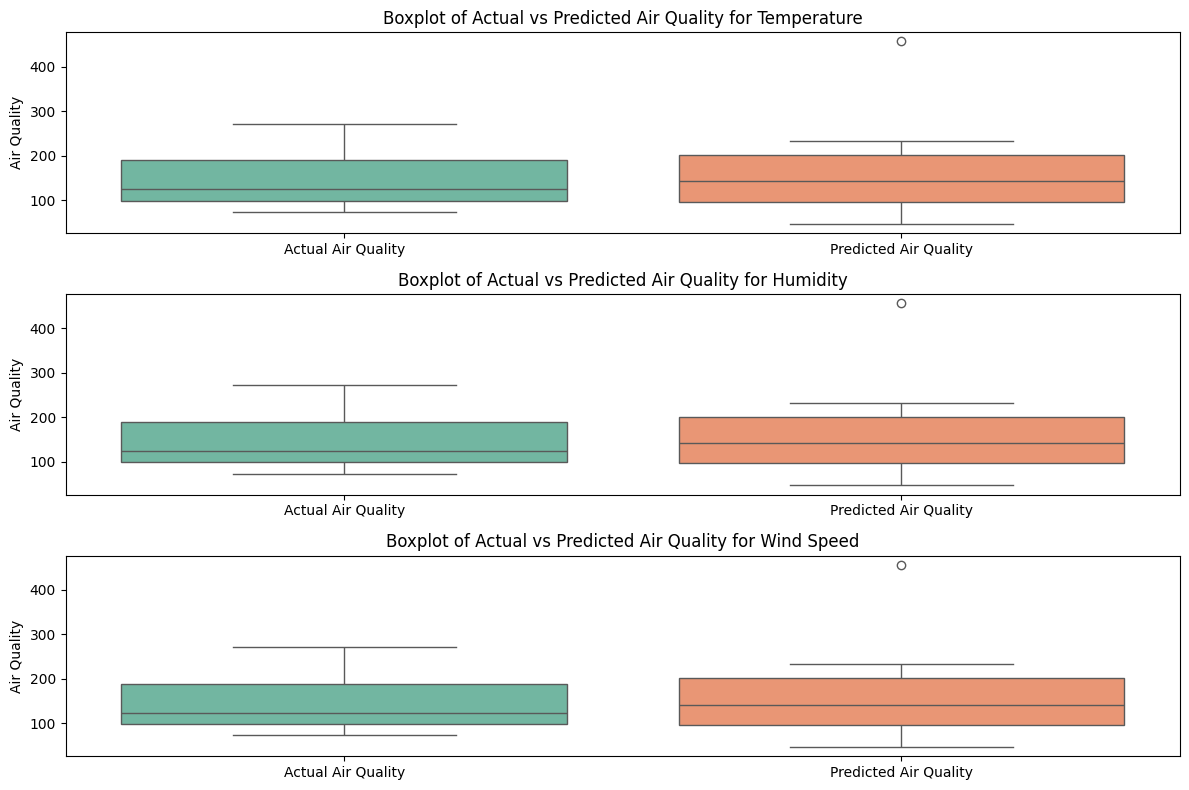

In [16]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for comparison
df = pd.DataFrame({
    'Temperature': X['Temperature'],
    'Humidity': X['Humidity'],
    'Wind Speed': X['Wind Speed'],
    'Actual Air Quality': Y,
    'Predicted Air Quality': model.predict(X)
})

plt.figure(figsize=(12, 8))

# Box plot for comparing Actual vs Predicted values for Temperature
plt.subplot(3, 1, 1)
sns.boxplot(data=df[['Actual Air Quality', 'Predicted Air Quality']], palette="Set2")
plt.title('Boxplot of Actual vs Predicted Air Quality for Temperature')
plt.ylabel('Air Quality')

# Box plot for comparing Actual vs Predicted values for Humidity
plt.subplot(3, 1, 2)
sns.boxplot(data=df[['Actual Air Quality', 'Predicted Air Quality']], palette="Set2")
plt.title('Boxplot of Actual vs Predicted Air Quality for Humidity')
plt.ylabel('Air Quality')

# Box plot for comparing Actual vs Predicted values for Wind Speed
plt.subplot(3, 1, 3)
sns.boxplot(data=df[['Actual Air Quality', 'Predicted Air Quality']], palette="Set2")
plt.title('Boxplot of Actual vs Predicted Air Quality for Wind Speed')
plt.ylabel('Air Quality')

plt.tight_layout()
plt.show()